# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
import json
from datetime import date

# Import API key
from api_key import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# weather API api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='

for index, city in enumerate(cities):
    query_url = f'{url}{city}&appid={weather_api_key}'
    if index < 30:
        print(f'{url}{city}&appid="YOUR_API_KEY"')

http://api.openweathermap.org/data/2.5/weather?units=imperial&q=torbay&appid="YOUR_API_KEY"
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=licheng&appid="YOUR_API_KEY"
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=urzhum&appid="YOUR_API_KEY"
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=illoqqortoormiut&appid="YOUR_API_KEY"
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=etchoropo&appid="YOUR_API_KEY"
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=ushuaia&appid="YOUR_API_KEY"
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=sao joao da barra&appid="YOUR_API_KEY"
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=qui nhon&appid="YOUR_API_KEY"
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=atuona&appid="YOUR_API_KEY"
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=nanortalik&appid="YOUR_API_KEY"
http://api.openweathermap.org/data/2.5/weather?u

##### As can be seen in the previous cell, URLs with cities containing spaces are not working. Therefore I need to create new list of cities where spaces are replaced with a "+" sign.  For example http://api.openweathermap.org/data/2.5/weather?units=imperial&appid={API_Key}&q=San+Francisco works fine

In [4]:
# replacing space with + in cities list
cities_for_url = [x.replace(' ', '+') for x in cities]
# grabing one record from the API to see what we are dealing with
response_sample = requests.get(f'{url}{cities_for_url[0]}&appid={weather_api_key}').json()
response_sample

{'coord': {'lon': -52.73, 'lat': 47.67},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 30.87,
  'feels_like': 21.06,
  'temp_min': 30,
  'temp_max': 32,
  'pressure': 1025,
  'humidity': 74},
 'visibility': 10000,
 'wind': {'speed': 9.17, 'deg': 130},
 'clouds': {'all': 90},
 'dt': 1607879851,
 'sys': {'type': 1,
  'id': 998,
  'country': 'CA',
  'sunrise': 1607857895,
  'sunset': 1607888356},
 'timezone': -12600,
 'id': 6167817,
 'name': 'Torbay',
 'cod': 200}

In [5]:
# seeing how to access data from the API response
print(type(response_sample))
print(response_sample.keys())
print(response_sample['dt'])

<class 'dict'>
dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])
1607879851


In [6]:
# set up lists to hold response info
cities_from_API = []
country = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
lat_from_API = []
lon_from_API = []
date = []


In [7]:
print('Beginning Data Retrieval')
print('______________________________________')
    
for index, city in enumerate(cities_for_url):
    query_url = f'{url}{city}&appid={weather_api_key}'
    
    try:
        response = requests.get(query_url).json()
        cities_from_API.append(response['name'])
        country.append(response['sys']['country'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        lat_from_API.append(response['coord']['lat'])
        lon_from_API.append(response['coord']['lon'])
        date.append(response['dt'])
        print(f"Processing Record {index} of {len(cities_for_url)} | {response['name']}")
    
    except KeyError:
        print('City not found. Skipping...')



Beginning Data Retrieval
______________________________________
Processing Record 0 of 600 | Torbay
Processing Record 1 of 600 | Licheng
Processing Record 2 of 600 | Urzhum
City not found. Skipping...
Processing Record 4 of 600 | Etchoropo
Processing Record 5 of 600 | Ushuaia
Processing Record 6 of 600 | São João da Barra
Processing Record 7 of 600 | Qui Nhon
Processing Record 8 of 600 | Atuona
Processing Record 9 of 600 | Nanortalik
Processing Record 10 of 600 | Kamina
Processing Record 11 of 600 | Dawei
Processing Record 12 of 600 | Chui
Processing Record 13 of 600 | Kaa-Khem
Processing Record 14 of 600 | Kisaran
City not found. Skipping...
Processing Record 16 of 600 | Sucre
Processing Record 17 of 600 | Qaanaaq
Processing Record 18 of 600 | Saldanha
Processing Record 19 of 600 | Saskylakh
Processing Record 20 of 600 | Celestún
Processing Record 21 of 600 | Douglas
Processing Record 22 of 600 | Tagusao
City not found. Skipping...
Processing Record 24 of 600 | Busselton
Processing Re

Processing Record 211 of 600 | Djebeniana
Processing Record 212 of 600 | Kumul
Processing Record 213 of 600 | Giyani
City not found. Skipping...
Processing Record 215 of 600 | Lagoa
Processing Record 216 of 600 | Ovada
Processing Record 217 of 600 | Yellowknife
Processing Record 218 of 600 | Haines Junction
Processing Record 219 of 600 | Nakusp
Processing Record 220 of 600 | Nara
Processing Record 221 of 600 | Necochea
Processing Record 222 of 600 | Klaksvík
Processing Record 223 of 600 | Nísia Floresta
City not found. Skipping...
Processing Record 225 of 600 | Pitimbu
Processing Record 226 of 600 | Kavieng
City not found. Skipping...
Processing Record 228 of 600 | Tsabong
Processing Record 229 of 600 | Tateyama
Processing Record 230 of 600 | Belaya Gora
Processing Record 231 of 600 | Caravelas
Processing Record 232 of 600 | Leer
Processing Record 233 of 600 | Bambous Virieux
Processing Record 234 of 600 | Tuktoyaktuk
Processing Record 235 of 600 | Pyinmana
Processing Record 236 of 600

Processing Record 418 of 600 | Pevek
Processing Record 419 of 600 | Zhoucheng
Processing Record 420 of 600 | Pointe Michel
Processing Record 421 of 600 | San Juan de los Morros
Processing Record 422 of 600 | Ipiaú
Processing Record 423 of 600 | Bonavista
Processing Record 424 of 600 | Safaga
Processing Record 425 of 600 | Flinders
Processing Record 426 of 600 | Tilichiki
Processing Record 427 of 600 | Fairbanks
Processing Record 428 of 600 | Indianola
Processing Record 429 of 600 | Sur
Processing Record 430 of 600 | Zhezkazgan
Processing Record 431 of 600 | Ntcheu
Processing Record 432 of 600 | Yulara
Processing Record 433 of 600 | Morondava
Processing Record 434 of 600 | Lompoc
Processing Record 435 of 600 | Nuevo Progreso
Processing Record 436 of 600 | Lagos
Processing Record 437 of 600 | Dargaville
Processing Record 438 of 600 | Banda Aceh
City not found. Skipping...
Processing Record 440 of 600 | Oga
Processing Record 441 of 600 | Moa
City not found. Skipping...
Processing Record 4

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# assembling the lists into DataFrame
cities_weather_df = pd.DataFrame({
    "city" : cities_from_API,
    "country": country,
    "max_temp" : max_temp,
    "humidity" : humidity,
    "cloudiness" : cloudiness,
    "wind_speed" : wind_speed,
    "lat" : lat_from_API,
    "lon" : lon_from_API,
    "date": date
})
cities_weather_df


,city,country,max_temp,humidity,cloudiness,wind_speed,lat,lon,date
0,Torbay,CA,32.00,74,90,9.17,47.67,-52.73,1607879851
1,Licheng,CN,73.00,88,90,8.95,23.30,113.83,1607879717
2,Urzhum,RU,8.67,94,68,6.29,57.11,50.00,1607879874
3,Etchoropo,MX,66.99,64,0,3.00,26.77,-109.67,1607879874
4,Ushuaia,AR,46.40,70,75,13.87,-54.80,-68.30,1607879874
...,...,...,...,...,...,...,...,...,...
546,Pelym,RU,18.64,91,98,7.20,61.01,62.00,1607879941
547,Escanaba,US,24.80,73,90,3.36,45.75,-87.06,1607879941
548,Manaus,BR,89.60,66,40,3.36,-3.10,-60.02,1607879941
549,Burmakino,RU,21.20,73,90,8.95,57.42,40.24,1607879942


In [9]:
# reviewing high level statistics for the data set
cities_weather_df.describe()

,max_temp,humidity,cloudiness,wind_speed,lat,lon,date
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02
mean,51.955953,73.431942,56.813067,8.974537,21.053902,14.346207,1.607880e+09
std,32.185658,19.734566,37.834802,6.818956,33.558862,89.698730,1.391003e+02
min,-49.760000,1.000000,0.000000,0.220000,-54.800000,-179.170000,1.607879e+09
25%,31.990000,65.000000,20.000000,4.025000,-6.445000,-59.525000,1.607880e+09
50%,62.170000,78.000000,72.000000,7.000000,25.520000,16.430000,1.607880e+09
75%,77.825000,88.000000,90.000000,12.030000,50.240000,94.425000,1.607880e+09
max,100.400000,100.000000,100.000000,60.620000,78.220000,179.320000,1.607880e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
* Since the data is selected based on time and random selection of the coordinates. I'm going to include the scrip so clean data set never has cities where the humidity > 100% and I will then save the clean data set into a csv file

In [11]:
clean_df = cities_weather_df[cities_weather_df['humidity']<=100]
clean_df.describe()

,max_temp,humidity,cloudiness,wind_speed,lat,lon,date
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02
mean,51.955953,73.431942,56.813067,8.974537,21.053902,14.346207,1.607880e+09
std,32.185658,19.734566,37.834802,6.818956,33.558862,89.698730,1.391003e+02
min,-49.760000,1.000000,0.000000,0.220000,-54.800000,-179.170000,1.607879e+09
25%,31.990000,65.000000,20.000000,4.025000,-6.445000,-59.525000,1.607880e+09
50%,62.170000,78.000000,72.000000,7.000000,25.520000,16.430000,1.607880e+09
75%,77.825000,88.000000,90.000000,12.030000,50.240000,94.425000,1.607880e+09
max,100.400000,100.000000,100.000000,60.620000,78.220000,179.320000,1.607880e+09


In [12]:
# saving clean data set into CSV file
clean_df.to_csv("./output_data/cities_weather.csv", index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

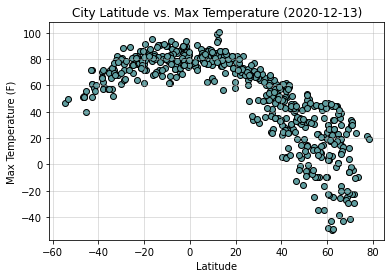

In [42]:
plt.scatter(clean_df['lat'], clean_df['max_temp'], facecolor='cadetblue', edgecolor = "black")
day_of_analysis = date.today()
plt.title(f'City Latitude vs. Max Temperature ({day_of_analysis})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(linestyle='-', linewidth=1, alpha = 0.4)
plt.savefig("../Images/city_latitude_vs_max_temp.png")

###### The code creates scatter plot of lattitude vs max temputure. It is obvious the closer you are to the equator the highre the temperature is

## Latitude vs. Humidity Plot

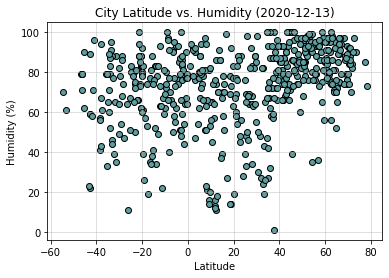

In [43]:
plt.scatter(clean_df['lat'], clean_df['humidity'], facecolor='cadetblue', edgecolor = "black")
day_of_analysis = date.today()
plt.title(f'City Latitude vs. Humidity ({day_of_analysis})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(linestyle='-', linewidth=1, alpha = 0.4)
plt.savefig("../Images/city_latitude_vs_humidity.png")

###### The code builds scatter plot of latitude vs humidity. There is no clear relation between humidity and latitude. However it does seem like North Pole has more occurrences of higher humidity

## Latitude vs. Cloudiness Plot

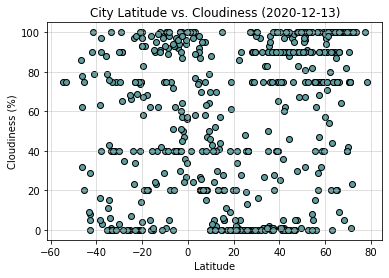

In [44]:
plt.scatter(clean_df['lat'], clean_df['cloudiness'], facecolor='cadetblue', edgecolor = "black")
day_of_analysis = date.today()
plt.title(f'City Latitude vs. Cloudiness ({day_of_analysis})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(linestyle='-', linewidth=1, alpha = 0.4)
plt.savefig("../Images/city_latitude_vs_cloudiness.png")

###### The code builds scatter plot of latitude vs cloudiness. There is no clear relation between cloudiness and latitude.

## Latitude vs. Wind Speed Plot

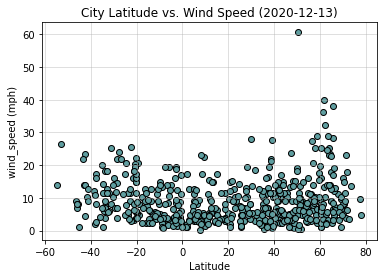

In [45]:
plt.scatter(clean_df['lat'], clean_df['wind_speed'], facecolor='cadetblue', edgecolor = "black")
day_of_analysis = date.today()
plt.title(f'City Latitude vs. Wind Speed ({day_of_analysis})')
plt.xlabel('Latitude')
plt.ylabel('wind_speed (mph)')
plt.grid(linestyle='-', linewidth=1, alpha = 0.4)
plt.savefig("../Images/city_latitude_vs_wind_speed.png")

###### The code builds scatter plot of latitude vs wind speed. There is no clear relation between wind speed and latitude.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


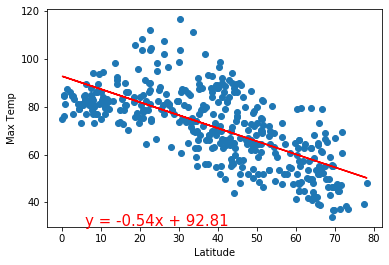

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


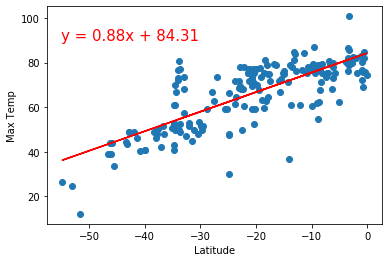

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


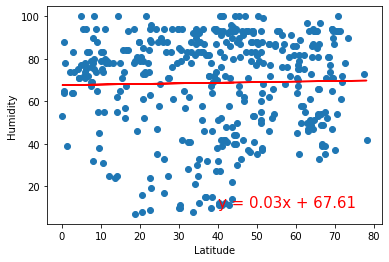

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


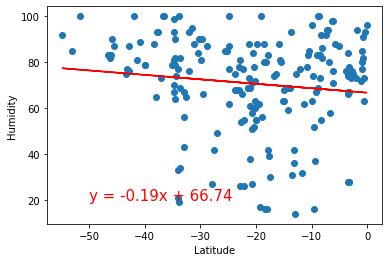

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


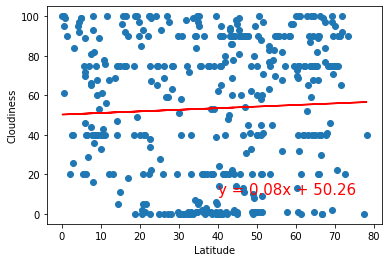

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


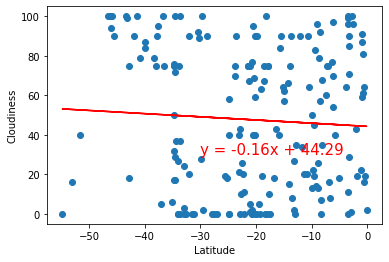

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


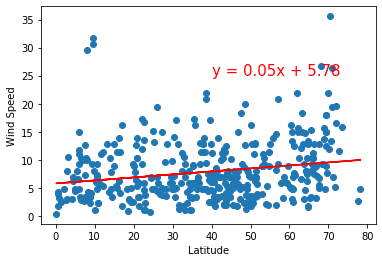

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


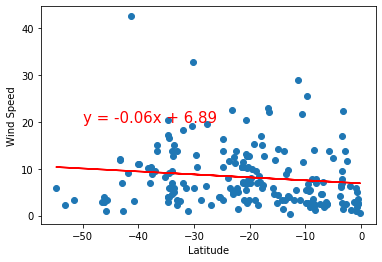